**This Jupyter Notebook is used to evaluate different aspects from the .log files. Especially Battery Drainage and Runtime Stability.**

### Measurement 1
- Recording, within non Wifi, Backend not reachable.
- 400mAh Battery
- Sadly Watchdog Panics due to SD card write fails.

In [8]:
import datetime

def extract_battery_info(log_line):
    """
    Extracts datetime and battery voltage from a log line.
    
    Args:
        log_line (str): Log line in format 'SessionID_Index_Date_Time: Battery: Voltage (Percentage)'
                        Example: '21_25_25-02-20_11-00-00: Battery: 3.71V (26%)'
                        
    Returns:
        tuple: (datetime_object, voltage_float)
    """
    # Split the log line to separate metadata from battery info
    parts = log_line.split(': Battery: ')
    if len(parts) != 2:
        raise ValueError(f"Invalid log format: {log_line}")
    
    # Extract date and time from the metadata section
    metadata = parts[0].split('_')
    if len(metadata) < 4:
        raise ValueError(f"Invalid metadata format: {parts[0]}")
    
    date_str = metadata[-2]
    time_str = metadata[-1]
    
    # Parse the date (DD-MM-YY) and time (HH-MM-SS)
    year, month, day = map(int, date_str.split('-'))
    hour, minute, second = map(int, time_str.split('-'))
    
    # Adjust the year to 2000+ range if it's a two-digit year
    if year < 100:
        year += 2000
    
    # Create datetime object
    dt = datetime.datetime(year, month, day, hour, minute, second)
    
    # Extract voltage from battery info
    battery_info = parts[1]
    voltage_str = battery_info.split('V')[0].strip()
    voltage = float(voltage_str)
    
    return (dt, voltage)

In [3]:
def get_battery_data(file: str = "logs/device.log"):
    # Open the log file
    with open(file, 'r') as f:
        # Read the log data
        log_data = f.read()
    # Close the log file
    f.close()
    # Split the log data with each new line and load into a list
    data_list = log_data.split('\n')

    # Find lines with the substrin ": Battery:"
    battery_data = [line for line in data_list if ": Battery:" in line]
    battery_data = [extract_battery_info(line) for line in battery_data]
    
    return battery_data

In [15]:
def filter_by_date(battery_data, start_date, end_date=None):
    
    # Filter the data
    filtered_data = [(dt, voltage) for dt, voltage in battery_data if dt >= start_date]
    if end_date:
        filtered_data = [(dt, voltage) for dt, voltage in filtered_data if dt <= end_date]
    
    return filtered_data

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_battery_voltage(battery_data):
    """
    Plot battery voltage over time from a list of (datetime, voltage) tuples.
    
    Args:
        battery_data (list): List of tuples containing (datetime_obj, voltage)
    """
    # Unpack the datetime and voltage values from the list of tuples
    datetimes, voltages = zip(*battery_data)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(datetimes, voltages, marker='o', linestyle='-', markersize=4)
    
    # Format the x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Add labels and title
    plt.xlabel('Date and Time')
    plt.ylabel('Battery Voltage (V)')
    plt.title('Battery Voltage Over Time')
    plt.grid(True)
    
    # Rotate date labels for better readability
    plt.gcf().autofmt_xdate()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


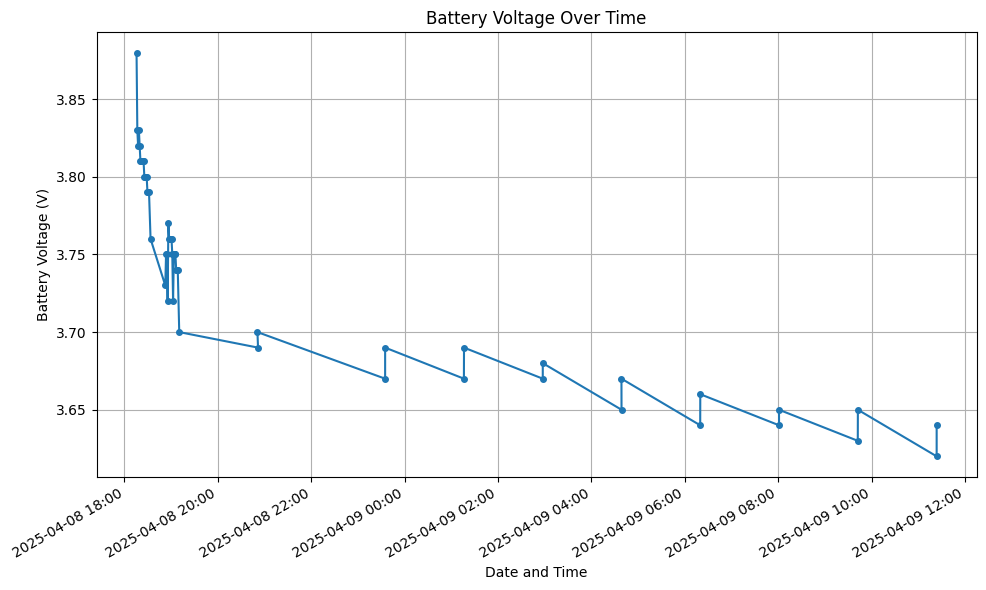

In [18]:
file_name = "logs/25-04-09_Large.log"
data_filtered = filter_by_date(get_battery_data(file_name), datetime.datetime(2025, 4, 8))
plot_battery_voltage(data_filtered)

### Measurement 2
- Recording and Filetransfer.
- 280mAh Battery
- No interrupts
- Until ~18:15 with USB C Power, afterwards on Battery. Lasted for ~2,5h.

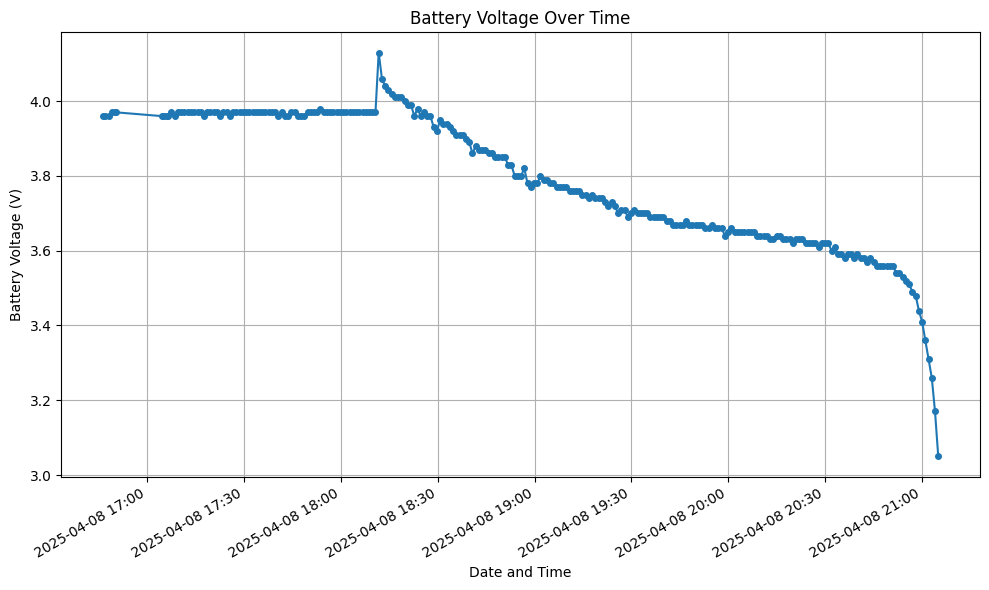

In [19]:
file_name = "logs/25-04-09_Small.log"
data_filtered = filter_by_date(get_battery_data(file_name), datetime.datetime(2025, 4, 8))
plot_battery_voltage(data_filtered)